In [1]:
!pip install -U sentence-transformers scikit-learn pandas numpy


Defaulting to user installation because normal site-packages is not writeable
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.4 MB 2.8 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.4 MB 3.9 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.4 MB 3.6 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.4 MB 3.0 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.4 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.4 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.4 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.4 MB 2.6 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.4 MB 1.6 MB/s eta 0:00:06
   ----------- -----------

In [2]:
# import libraries
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [5]:
#Load the dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

# Drop rows where Rating is NaN
df = df.dropna(subset=['Rating'])

# Fill other NaNs with empty strings
df.fillna('', inplace=True)


In [9]:
df['text'] = (
    df['Name'].astype(str) + ' ' +
    df['Genre'].astype(str) + ' ' +
    df['Director'].astype(str) + ' ' +
    df['Actor 1'].astype(str) + ' ' +
    df['Actor 2'].astype(str) + ' ' +
    df['Actor 3'].astype(str)
)


In [11]:
pip install ipywidgets==8.1.1


Defaulting to user installation because normal site-packages is not writeable
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   -------- ------------------------------ 30.7/139.4 kB 262.6 kB/s eta 0:00:01
   ----------------- --------------------- 61.4/139.4 kB 409.6 kB/s eta 0:00:01
   -------------------------------------- 139.4/139.4 kB 690.8 kB/s eta 0:00:00
Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl (216 kB)
Using cached widgetsnbextension-4.0.14-py3-none-any.whl (2.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager@3.0


(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
C:\anaconda\Lib\site-packages\jupyterlab\debuglog.py:56: UserWarning: An error occurred.
  warnings.warn("An error occurred.")
C:\anaconda\Lib\site-packages\jupyterlab\debuglog.py:57: UserWarning: ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
  warnings.warn(msg[-1].strip())
C:\anaconda\Lib\site-packages\jupyterlab\debuglog.py:58: UserWarning: See the log file for details: C:\Users\syeds\AppData\Local\Temp\jupyterlab-debug-kgwyqem8.log
  warnings.warn(f"See the log file for details: {log_path!s}")


In [14]:
#  Encode text
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['text'].tolist(), show_progress_bar=False)


In [15]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = embeddings
y = df['Rating']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
#Train the Regressor
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [17]:
#Predict and Evaluate the Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 1.0412133838383837
RMSE: 1.2930951505020674
R² Score: 0.10061079595212574


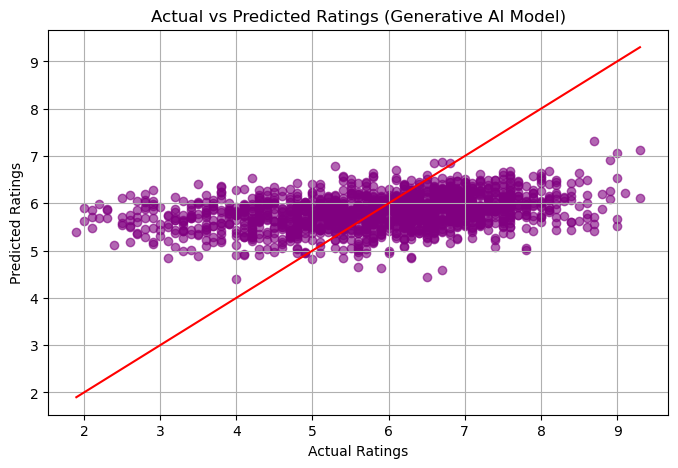

In [18]:
#Visualize Actual vs Predicted Ratings
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings (Generative AI Model)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.grid()
plt.show()


In [19]:
#saving the model
import joblib

joblib.dump(regressor, 'movie_rating_predictor.pkl')


['movie_rating_predictor.pkl']

In [20]:
# Generate Predictions for New Movies
sample_text = ["3 Idiots Comedy Drama Rajkumar Hirani Aamir Khan Kareena Kapoor R. Madhavan"]


In [21]:
#Convert to Embedding
sample_embedding = model.encode(sample_text)


In [22]:
#Predict the Rating
predicted_rating = regressor.predict(sample_embedding)
print("Predicted Rating:", predicted_rating[0])


Predicted Rating: 5.410000000000002
